In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scinum import scinum as sn
from scipy.optimize import curve_fit
import pandas as pd
import scipy
plt.style.use('ggplot')

class dataa:
    def __init__(self, filename = None):
        self.filename = filename if filename else None
        self.data = pd.read_csv(filename, delimiter= ',', header = 0) if filename else None

    def show(self):
        return self.data

    def linear(self, dy = 0, dx = 0, title = "", ylabel = "", xlabel = "", yname = "", xname = ""):        
        Y = sn(np.transpose([self.data[yname], dy]))        
        X = sn(self.data[xname], uncer = dx)
        
        x = sn.f(self.up, X)
        y = sn.f(self.down, Y)
        z, cov = np.polyfit(x.n, y.n, 1, w= 1/y.u**2, cov = True)
        p = np.poly1d(z)
        
        self.get_chisq(x.n,y.n,dy,*z, mode = "linear")
        
        plt.rcParams.update({'font.size': 11})
        fig = plt.figure(dpi = 300, figsize = (7,2.5))
        plt.title(title, fontsize = 16)
        plt.ylabel(ylabel, fontsize = 14)
        plt.errorbar(x.n, y.n, yerr = y.u, xerr = x.u, fmt = '.')
        plt.plot(x.n, p(x.n))
        plt.legend(fontsize = 10)
        ax1 = fig.add_axes((.124,-.1,.775,.2))
        ax1.errorbar(x.n, y.n - p(x.n), yerr = y.u, xerr = x.u, label = 'Residuals', fmt = '.')
        ax1.set_xlabel(xlabel, fontsize = 14)
        plt.show()
        
        return z, np.sqrt(np.diag(cov))
        
    def nonlinear(self, f = None, dy = 0, dx = 0, title = "", ylabel = "", xlabel = "", yname = "", xname = "", p0 = None):
        
        Y = sn(self.data[yname], uncer = dy)        
        X = sn(self.data[xname], uncer = dx)
        
        x = sn.f(self.up, X)
        y = sn.f(self.down, Y)
        
        best_params, fit_cov = curve_fit(f, x.n, y.n, p0)
        print(best_params)

        self.get_chisq(x.n,y.n,dy,f, best_params, mode = "nonlinear")

        fit = [f(j, *best_params) for j in x.n]

        plt.rcParams.update({'font.size': 11})
        fig = plt.figure(dpi = 300, figsize = (7,3))
        plt.title(title, fontsize = 16)
        plt.ylabel(ylabel, fontsize = 14)
        plt.errorbar(x.n, y.n, yerr = y.u, xerr = x.u, fmt = '.', label = 'Data')
        plt.plot(x.n, fit, label = 'Fit')
        plt.legend(fontsize = 10)
        ax1 = fig.add_axes((.124,-.1,.775,.2))
        ax1.errorbar(x.n, fit - y.n, yerr = y.u, xerr = x.u, label = 'Residuals', fmt = '.')
        ax1.set_xlabel(xlabel, fontsize = 14)
        plt.show()
        
        return best_params, np.sqrt(np.diag(fit_cov))

    def hist(self, label, bins = None):
        plt.hist(self.data[label], bins = bins)
        plt.xlabel(label)
        plt.ylabel('Count')
    
    def up(self, u):
        return u
    
    def down(self, d):
        return d
        
    def gaussian(self, x, mean, std):
        return 1/(std*np.sqrt(2*np.pi))*np.exp((-(x-mean)**2)/(2*std**2))
    
    def poisson(x, lamda, k):
        return lamda**k*np.exp(-lamda)/scipy.special.factorial(k)
    
    def get_a(self, x, y):
        return np.sum(x*y)/np.sum(x**2)

    def damped_trig(self, t, g, w, p):
        return np.exp(g*t)*np.cos(w*t+p)

    def nonlinear_chisq(self, x,y,ey,f, args):
        return np.sum((y-f(x, *args))**2/ey**2)
    
    def sinusoid(self, t, w, phi):
        return np.cos(w*t+phi)
    
    def linear_chisq(self, x,y,ey, a, b):
        return np.sum((y-a*x-b)**2/ey**2)
    
    def get_chisq(self, x,y,ey,a, b, mode = "linear"):
        if mode == "linear":
            print("Chi-Square: ", self.linear_chisq(x, y, ey, a, b))
            k = len(x) - 2
            print("degrees of freedom: ", k)
            print([k + (i+2)*np.sqrt(2*k) for i in range(3)])
            print("CHISQ FACTOR: ", self.linear_chisq(x, y, ey, a, b)/k)
        else:
            print("Chi-Square: ", self.nonlinear_chisq(x, y, ey, a, b))
            k = len(x) - len(b)
            print("degrees of freedom: ", k)
            print([k + (i+2)*np.sqrt(2*k) for i in range(3)])
            print("CHISQ FACTOR: ", self.nonlinear_chisq(x, y, ey, a, b)/k)

    def weighted_x(self, x, u):
        return np.sum(x/u**2)/(np.sum(1/u**2))

    def weighted_u(self, x, u):
        return np.sqrt(1/(np.sum(1/u**2)))


In [37]:
df1 = pd.read_csv('sample-data (1).txt')
df = np.array([k for k in df1['-76.81170'] if isinstance(k, float)])

FileNotFoundError: [Errno 2] File b'sample-data (1).txt' does not exist: b'sample-data (1).txt'

In [38]:
penis = np.linspace(600, 2599.352, len(df))
plt.plot(penis, np.power(10, df/10))
# plt.yscale('log')

NameError: name 'df' is not defined

In [39]:
plt.plot(np.power(10, df/10)[300000:300010])

NameError: name 'df' is not defined

In [40]:
x = np.power(10, df/10)
t = np.arange(len(x))/8000
pts = len(x)
tmax = max(t)
t = np.linspace(0, tmax, pts)
plt.figure(figsize = (8,6))
plt.plot(t,x)

NameError: name 'df' is not defined

In [41]:
sp = np.fft.fft(x)
freq = np.fft.fftfreq(n = pts, d = tmax/pts)
plt.plot(freq, abs(sp))
plt.xlim([0,4000])
plt.ylim([0, 100])
# plt.plot(freq, sp.imag)

NameError: name 'x' is not defined

[-1.2         1.57079633]
Chi-Square:  2.0174116167456296e-24
degrees of freedom:  4
[9.65685424949238, 12.485281374238571, 15.313708498984761]
CHISQ FACTOR:  5.043529041864074e-25


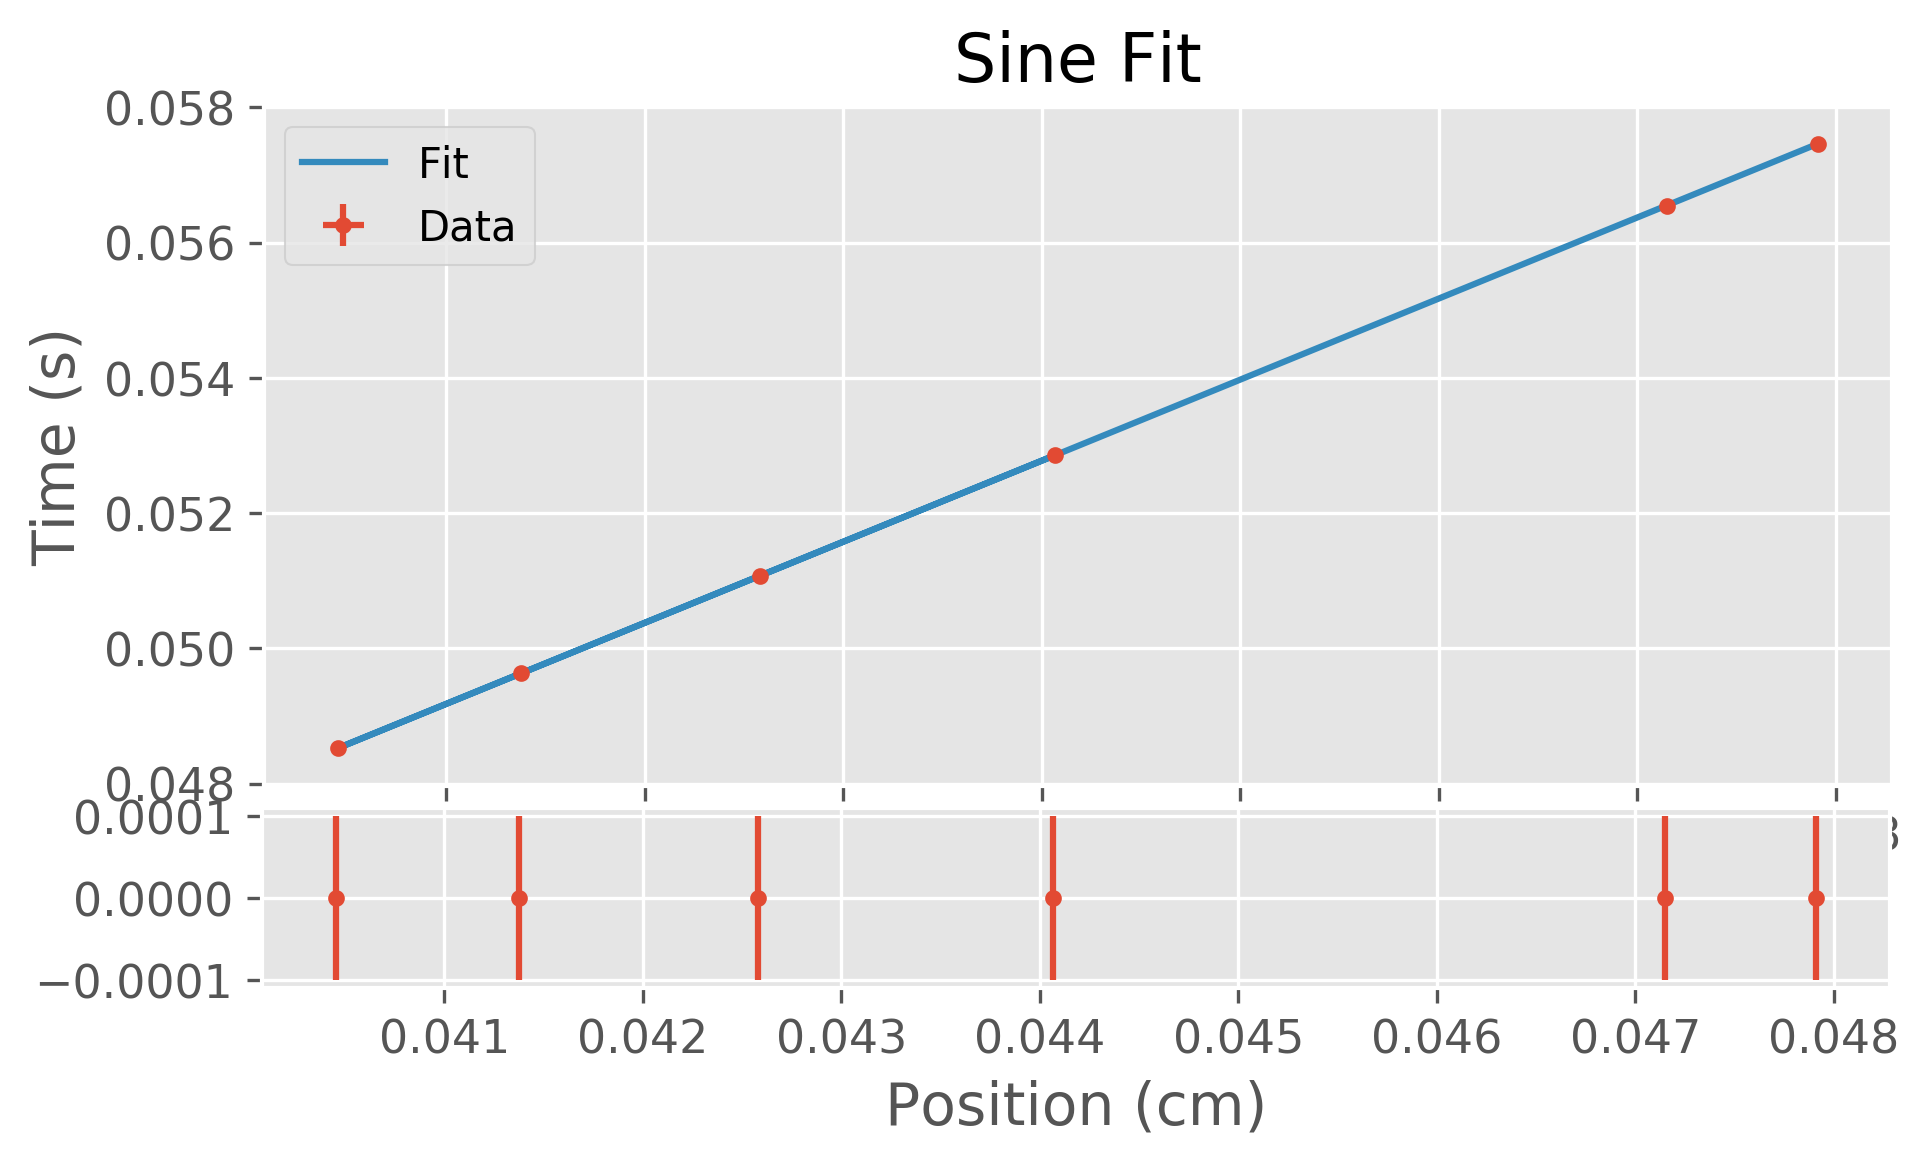

(array([-1.2       ,  1.57079633]), array([1.04144169e-14, 4.58335790e-16]))

In [42]:
d = dataa()
d.data = {'x': np.sin(t*1.2), 't': t}
d.nonlinear(f = d.sinusoid, dy = 0.0001, dx = 0, title = "Sine Fit", ylabel = "Time (s)", xlabel = "Position (cm)", yname = "x", xname = "t", p0 = None)

In [43]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(abs(sp))
np.diff(peaks)
plt.plot(freq, abs(sp))
plt.plot(freq[peaks], abs(sp)[peaks], "x")
plt.xlim([0,2])

NameError: name 'sp' is not defined

In [ ]:
peaks = peaks[freq[peaks] > 0]

In [ ]:
print("average peak distance and standard deviation: ", np.mean(np.diff(peaks)), np.std(np.diff(peaks), ddof = 1))

In [ ]:
l = dataa()
l.data = {'freq': freq[peaks][:-1], 'isi': np.diff(peaks)}
l.linear(dy = 1, dx = 0, title = "Wavelength Deternmination", ylabel = "Peak Interval", xlabel = "Frequency (Hz)", yname = "isi", xname = "freq")

In [ ]:
d = [
    2.6226,
    2.1895,
    0.0007, 
    0.3048, 
    0.6668, 
    1.2033
]

d = np.array(d)

full_t = [
    [384, 385, 383, 384, 382, 383, 384, 382, 382, 383, 384],
    [377, 377, 377, 378, 375, 379, 377, 377, 376, 379, 377],
    [323, 325, 323, 324, 324, 323, 326, 322, 323, 324, 323],
    [331, 330, 331, 331, 331, 332, 330, 331, 333, 331, 330],
    [340, 341, 341, 337, 340, 341, 341, 343, 341, 342, 340],
    [355, 351, 355, 352, 351, 353, 350, 352, 351, 354, 354]
         ]

def get_err(x):
    return np.sqrt(2**2+np.std(x, ddof = 1)**2/np.sqrt(len(x)))

t = np.mean(full_t, axis = 1)/8000
dt = np.array([get_err(t)/8000 for t in full_t])

k = dataa()
k.data = {'d': d, 't': t*1000}
params, err = k.linear(dy = dt*1000, dx = 0, title = "Onset Latency vs. Distance", ylabel = "Latency (ms)", xlabel = "Distance (m)", yname = "t", xname = "d")

In [ ]:
v = sn([params[0]], err[0])
v.pr()

In [44]:
err[1]

0.12303674989240711

In [45]:
def inv(x):
    return 1/x

sn.f(inv, v).pr()

[[0.34469622 0.00955345]]


In [46]:
true = 344.82
true

344.82

3


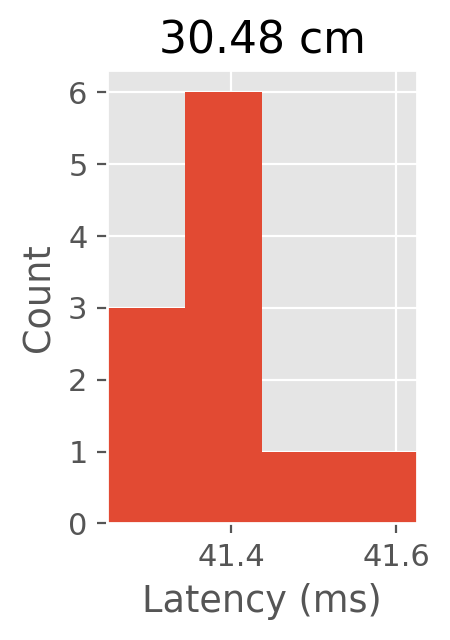

In [47]:
def hist(xdata):
        fig = plt.figure(dpi = 200, figsize = (2,3))
        print(int(10*(np.max(xdata) - np.min(xdata))))
        plt.hist(xdata, bins = int(10*(np.max(xdata) - np.min(xdata))) + 1, range = (np.min(xdata), np.max(xdata)))
        plt.xlabel('Latency (ms)')
        plt.ylabel('Count')
        plt.xlim([np.min(xdata), np.max(xdata)])
        plt.title("30.48 cm")
        
hist(np.array(full_t[3])/8)

In [48]:
pd.read_csv('sample-data1.txt',header=0) ##sample = 8000 hz,  this is boof

,-0.00040
0,-0.00030
1,-0.00014
2,-0.00003
3,0.00006
4,0.00011
...,...
239994,-0.01475
239995,-0.00820
239996,0.00631
239997,0.01364


In [72]:
data2 = np.power(10, pd.read_csv('sample-data2.txt',header=None)) ##sample = 8000 hz

In [77]:
data3 = np.power(10, pd.read_csv('sample-data3.txt',header=None)) ##sample = 8000 hz

In [78]:
data4 = np.power(10, pd.read_csv('sample-data4.txt',header=None ))

In [79]:
data5 = np.power(10, pd.read_csv('sample-data5.txt',header=None ))

In [80]:
data6 = np.power(10, pd.read_csv('sample-data6.txt',header=None ))

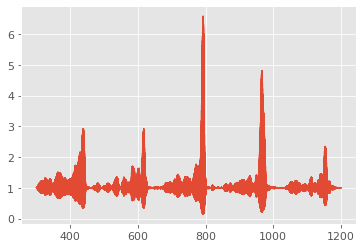

In [139]:
plt.plot(np.linspace(300, 1200, 240000), data2)
plt.show()

In [140]:
highest = 0
peaks=[]
peaksf=[]
for x in range(1,len(data2)-1):
    f = 300 + x*(3/800)
    if 400 < f < 440 or 600 < f < 620 or 760<f<800 or 965<f<990 or 1100<f<1200:
        if data2.iloc[x][0] > highest and data2.iloc[x][0] > 2:
            highest = data2.iloc[x][0]
        if (data2.iloc[x-1][0] - 2)/(data2.iloc[x+1][0] - 2) < 0:
            peaks.append(highest)
            peaksf.append(f)
            highest = 0

print(peaks)

[0, 2.002534468097134, 0, 2.0107589016273115, 0, 2.016972607033111, 0, 2.024556960203506, 0, 2.019389063959944, 0, 2.0207379606676255, 2.012658074776575, 0, 0, 2.0410798721942514, 2.007104570982569, 0, 0, 2.0489435810775225, 0, 2.0545182339509367, 0, 2.015301369417979, 2.065189936028283, 0, 0, 2.0362917418956608, 2.0519179941163426, 0, 0, 2.071237974769321, 2.0519179941163426, 0, 0, 2.073623948825222, 2.026935831191118, 0, 0, 2.089199917426938, 2.0048874624763937, 0, 0, 2.0362917418956608, 2.0971041515361106, 0, 0, 2.0632887014891867, 2.086459696519853, 0, 0, 2.089199917426938, 2.0748657413556093, 0, 0, 2.1075117275637143, 2.0630511702725154, 0, 0, 2.0205518523941564, 2.1121754963361417, 0, 0, 2.064952185936496, 2.1220225759592877, 0, 0, 2.084490883097289, 2.1085310462543077, 0, 0, 2.11621603109515, 2.0958007913216927, 0, 0, 2.008214044488846, 2.135895496302301, 0, 0, 2.0522960061942968, 2.1371253705370936, 0, 0, 2.0896329127435265, 2.135010425127227, 0, 0, 2.1147060121651675, 2.122902

In [152]:
print(peaksf)

[438.23249999999996, 613.8824999999999, 616.72875, 792.84375, 967.09125, 1154.3775]


In [142]:
x=0
while(x +1 < len(peaks)):
    if peaks[x+1]>peaks[x] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x])
        peaksf.remove(peaksf[x])
    elif peaks[x] > peaks[x+1] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x+1])
        peaksf.remove(peaksf[x+1])
    else:
        x += 1

In [143]:
print(peaksf)

[438.40875, 617.49, 793.02, 966.8325, 1153.61625]


In [145]:
diffs=[]
for x in range(0, 4):
    diffs.append(peaksf[x+1] - peaksf[x])
print(diffs)
print(np.mean(diffs))

[179.08125, 175.52999999999997, 173.8125, 186.78375000000005]
178.801875


In [150]:
highest = 0
peaks=[]
peaksf=[]
for x in range(1,len(data2)-1):
    f = 300 + x*(3/800)
    if 400 < f < 440 or 600 < f < 620 or 760<f<800 or 965<f<990 or 1100<f<1200:
        if data2.iloc[x][0] > highest and data2.iloc[x][0] > 2:
            highest = data2.iloc[x][0]
        if (data2.iloc[x-1][0] - 2)/(data2.iloc[x+1][0] - 2) < 0:
            peaks.append(highest)
            peaksf.append(f)
            highest = 0

x=0
while(x +1 < len(peaks)):
    if peaks[x+1]>peaks[x] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x])
        peaksf.remove(peaksf[x])
    elif peaks[x] > peaks[x+1] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x+1])
        peaksf.remove(peaksf[x+1])
    else:
        x += 1
        
        
diffs=[]
for x in range(0, 4):
    diffs.append(peaksf[x+1] - peaksf[x])
print(diffs)
print(np.mean(diffs))

[179.08125, 175.52999999999997, 173.8125, 186.78375000000005]
178.801875


In [153]:
highest = 0
peaks=[]
peaksf=[]
for x in range(1,len(data3)-1):
    f = 300 + x*(3/800)
    if 400 < f < 440 or 600 < f < 620 or 760<f<800 or 965<f<990 or 1100<f<1200:
        if data3.iloc[x][0] > highest and data3.iloc[x][0] > 2:
            highest = data3.iloc[x][0]
        if (data3.iloc[x-1][0] - 2)/(data3.iloc[x+1][0] - 2) < 0:
            peaks.append(highest)
            peaksf.append(f)
            highest = 0

x=0
while(x +1 < len(peaks)):
    if peaks[x+1]>peaks[x] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x])
        peaksf.remove(peaksf[x])
    elif peaks[x] > peaks[x+1] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x+1])
        peaksf.remove(peaksf[x+1])
    else:
        x += 1
        
x=0
while(x +1 < len(peaks)):
    if peaks[x+1]>peaks[x] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x])
        peaksf.remove(peaksf[x])
    elif peaks[x] > peaks[x+1] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x+1])
        peaksf.remove(peaksf[x+1])
    else:
        x += 1
        
        
diffs=[]
for x in range(0, 4):
    diffs.append(peaksf[x+1] - peaksf[x])
print(diffs)
print(np.mean(diffs))

[178.49625000000003, 176.115, 174.24749999999995, 187.2862500000001]
179.03625000000002


In [154]:
highest = 0
peaks=[]
peaksf=[]
for x in range(1,len(data4)-1):
    f = 300 + x*(3/800)
    if 400 < f < 440 or 600 < f < 620 or 760<f<800 or 965<f<990 or 1100<f<1200:
        if data4.iloc[x][0] > highest and data4.iloc[x][0] > 2:
            highest = data4.iloc[x][0]
        if (data4.iloc[x-1][0] - 2)/(data4.iloc[x+1][0] - 2) < 0:
            peaks.append(highest)
            peaksf.append(f)
            highest = 0

x=0
while(x +1 < len(peaks)):
    if peaks[x+1]>peaks[x] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x])
        peaksf.remove(peaksf[x])
    elif peaks[x] > peaks[x+1] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x+1])
        peaksf.remove(peaksf[x+1])
    else:
        x += 1
        
x=0
while(x +1 < len(peaks)):
    if peaks[x+1]>peaks[x] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x])
        peaksf.remove(peaksf[x])
    elif peaks[x] > peaks[x+1] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x+1])
        peaksf.remove(peaksf[x+1])
    else:
        x += 1
        
        
diffs=[]
for x in range(0, 4):
    diffs.append(peaksf[x+1] - peaksf[x])
print(diffs)
print(np.mean(diffs))

[180.98624999999993, 172.87125000000003, 174.885, 187.02374999999995]
178.94156249999997


In [147]:
highest = 0
peaks=[]
peaksf=[]
for x in range(1,len(data3)-1):
    f = 300 + x*(3/800)
    if 400 < f < 440 or 600 < f < 620 or 760<f<800 or 965<f<990 or 1100<f<1200:
        if data4.iloc[x][0] > highest and data4.iloc[x][0] > 2:
            highest = data4.iloc[x][0]
        if (data4.iloc[x-1][0] - 2)/(data4.iloc[x+1][0] - 2) < 0:
            peaks.append(highest)
            peaksf.append(f)
            highest = 0

print(peaks)

x=0
while(x +1 < len(peaks)):
    if peaks[x+1]>peaks[x] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x])
        peaksf.remove(peaksf[x])
    elif peaks[x] > peaks[x+1] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x+1])
        peaksf.remove(peaksf[x+1])
    else:
        x += 1
        
diffs=[]
for x in range(0, 4):
    diffs.append(peaksf[x+1] - peaksf[x])
print(diffs)
print(np.mean(diffs))

[0, 2.0076130035660364, 0, 2.0214825651972395, 0, 2.041408881914703, 0, 2.055275285885899, 0, 2.068902383776325, 0, 2.0890075038645994, 0, 2.0065038621154883, 2.0979735086192464, 0, 0, 2.025489517851655, 2.111883708663885, 0, 0, 2.046209044640997, 2.1334378707317723, 0, 0, 2.0565534436423007, 2.135010425127227, 0, 0, 2.080510921815344, 2.1513942323737094, 0, 0, 2.0912213301552875, 2.165060317073945, 0, 0, 2.1051837062709535, 2.16765419216276, 0, 0, 2.1313265745513306, 2.187157206580464, 0, 0, 2.141361548639108, 2.194118099577192, 0, 0, 2.1579431539095006, 2.1947244405778417, 0, 0, 2.178863381072152, 2.20673406908459, 0, 0, 2.1866033040170634, 2.204144181642896, 0, 0, 2.010203385161583, 2.206073612852387, 0, 0, 2.0276360309387735, 2.223617073483032, 0, 0, 2.0455966321465078, 2.226742509117375, 0, 0, 2.080079816677324, 2.2502978228237853, 0, 0, 2.0903066393928578, 2.255017933265952, 0, 0, 2.119385701361394, 2.264748600718951, 0, 0, 2.142150600727847, 2.2767744022526704, 0, 0, 2.155757968

In [148]:
highest = 0
peaks=[]
peaksf=[]
for x in range(1,len(data5)-1):
    f = 300 + x*(3/800)
    if 400 < f < 440 or 600 < f < 620 or 760<f<800 or 965<f<990 or 1100<f<1200:
        if data5.iloc[x][0] > highest and data5.iloc[x][0] > 2:
            highest = data5.iloc[x][0]
        if (data5.iloc[x-1][0] - 2)/(data5.iloc[x+1][0] - 2) < 0:
            peaks.append(highest)
            peaksf.append(f)
            highest = 0

print(peaks)

x=0
while(x +1 < len(peaks)):
    if peaks[x+1]>peaks[x] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x])
        peaksf.remove(peaksf[x])
    elif peaks[x] > peaks[x+1] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x+1])
        peaksf.remove(peaksf[x+1])
    else:
        x += 1
        
diffs=[]
for x in range(0, 4):
    diffs.append(peaksf[x+1] - peaksf[x])
print(diffs)
print(np.mean(diffs))

[0, 2.00271891683176, 0, 2.0210171552195626, 0, 2.0092778654170242, 0, 2.0362917418956608, 0, 2.015208563497108, 2.0262358732421286, 0, 0, 2.048236023233541, 0, 2.0234384577632607, 2.054660159944594, 0, 0, 2.0610569873351614, 2.023205514211355, 0, 0, 2.0225068444457315, 2.07491351745491, 0, 0, 2.0784520032863085, 2.059301804246038, 0, 0, 2.023671428135328, 2.097393897196038, 0, 0, 2.095270024979339, 2.0903066393928578, 0, 0, 2.0219480823518627, 2.1177758912940736, 0, 0, 2.104602102871724, 2.1168008439847266, 0, 0, 2.0271692042363605, 2.142101276455314, 0, 0, 2.110473969728372, 2.1415094737636204, 0, 0, 2.03783961245155, 2.1692519673660953, 0, 0, 2.1248584289569505, 2.1728012377545873, 0, 0, 2.043431105456871, 2.1885173805519305, 0, 0, 2.1437789390316992, 2.2085132034348245, 0, 0, 2.047905913196599, 2.2055657041082863, 0, 0, 2.1611255607697477, 2.2383603284325098, 0, 0, 2.049981774741698, 2.2232586976386735, 0, 0, 2.178261422038784, 2.264227183114935, 0, 0, 2.0601080540329297, 2.2513343

In [149]:
highest = 0
peaks=[]
peaksf=[]
for x in range(1,len(data6)-1):
    f = 300 + x*(3/800)
    if 400 < f < 440 or 600 < f < 620 or 760<f<800 or 965<f<990 or 1100<f<1200:
        if data6.iloc[x][0] > highest and data6.iloc[x][0] > 2:
            highest = data6.iloc[x][0]
        if (data6.iloc[x-1][0] - 2)/(data6.iloc[x+1][0] - 2) < 0:
            peaks.append(highest)
            peaksf.append(f)
            highest = 0

print(peaks)

x=0
while(x +1 < len(peaks)):
    if peaks[x+1]>peaks[x] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x])
        peaksf.remove(peaksf[x])
    elif peaks[x] > peaks[x+1] and (abs(peaksf[x+1] - peaksf[x]) < 100):
        peaks.remove(peaks[x+1])
        peaksf.remove(peaksf[x+1])
    else:
        x += 1
        
diffs=[]
for x in range(0, 4):
    diffs.append(peaksf[x+1] - peaksf[x])
print(diffs)
print(np.mean(diffs))

[0, 2.007566777100495, 0, 2.0202262041587624, 0, 2.011499829058406, 2.036526192141937, 0, 0, 2.0295978773122165, 2.0578797801613726, 0, 0, 2.045455332217547, 2.07247833845589, 0, 0, 2.0639539343992257, 2.0904991726155107, 0, 0, 2.0795051487809095, 2.10989090477726, 0, 0, 2.0943053396183378, 2.1196785255438417, 0, 0, 2.1205572408612485, 2.1462978968195814, 0, 0, 2.1284820891149963, 2.155162392384878, 0, 0, 2.152831304926377, 2.1756047583170974, 0, 0, 2.1697515136005743, 2.1919467529321235, 0, 0, 2.183685045816944, 2.2022164379132656, 0, 0, 2.006457661188579, 2.2205982846573753, 0, 0, 2.018505792306236, 2.232235445588945, 0, 0, 2.0374173492862013, 2.2431070482465127, 0, 0, 2.059064732011453, 2.260528568462932, 0, 0, 2.0741492318606367, 2.2729506160663675, 0, 0, 2.095125293852473, 2.2891275911036995, 0, 0, 2.1152417019625918, 2.308075441407759, 0, 0, 2.1297076946210485, 2.3179816841299425, 0, 0, 2.1563040569713463, 2.3371145544342005, 0, 0, 2.1732015193999654, 2.3536398034890866, 0, 0, 2.

7
sample-data7.txt
[179.8725, 175.67999999999995, 170.60625000000005, 191.9212500000001]
7.875845936707403
179.52000000000004


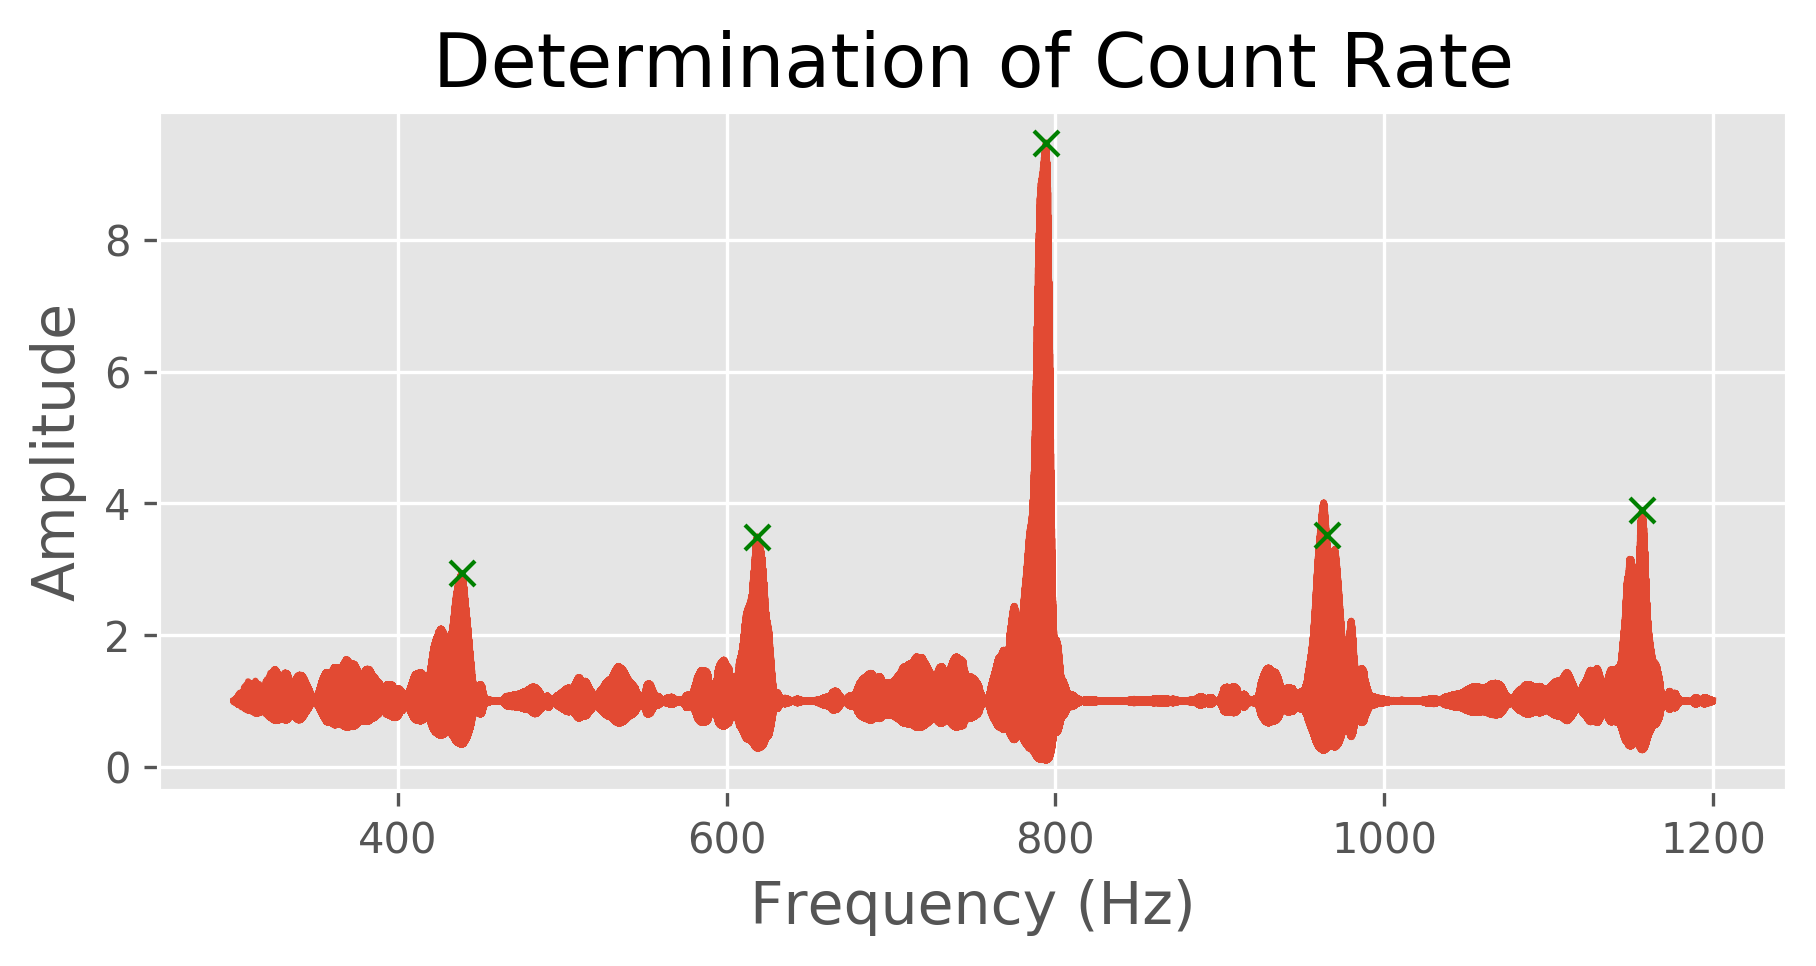

In [38]:
for i in range(7,8):
    print(i)
    dataname = 'sample-data' + str(i) + '.txt'
    print(dataname)
    data = np.power(10, pd.read_csv(dataname, header=None))
    #data = pd.read_csv(dataname, header=None)
    highest = 0
    peaks=[]
    peaksf=[]
    for x in range(1,len(data)-1):
        f = 300 + x*(3/800)
        if 400 < f < 440 or 600 < f < 620 or 760<f<800 or 965<f<990 or 1100<f<1200:
            if data.iloc[x][0] > highest and data.iloc[x][0] > 2:
                highest = data.iloc[x][0]
            if (data.iloc[x-1][0] - 2)/(data.iloc[x+1][0] - 2) < 0:
                peaks.append(highest)
                peaksf.append(f)
                highest = 0

    x=0
    while(x +1 < len(peaks)):
        if peaks[x+1]>peaks[x] and (abs(peaksf[x+1] - peaksf[x]) < 100):
            peaks.remove(peaks[x])
            peaksf.remove(peaksf[x])
        elif peaks[x] > peaks[x+1] and (abs(peaksf[x+1] - peaksf[x]) < 100):
            peaks.remove(peaks[x+1])
            peaksf.remove(peaksf[x+1])
        else:
            x += 1

    x=0
    while(x +1 < len(peaks)):
        if peaks[x+1]>peaks[x] and (abs(peaksf[x+1] - peaksf[x]) < 100):
            peaks.remove(peaks[x])
            peaksf.remove(peaksf[x])
        elif peaks[x] > peaks[x+1] and (abs(peaksf[x+1] - peaksf[x]) < 100):
            peaks.remove(peaks[x+1])
            peaksf.remove(peaksf[x+1])
        else:
            x += 1


    diffs=[]
    for x in range(0, len(peaks) - 1):
        diffs.append(peaksf[x+1] - peaksf[x])
    print(diffs)
    print(np.std(diffs))
    print(np.mean(diffs))
    
    
    fig = plt.figure(dpi = 300, figsize = (7,3))
    plt.title("Determination of Count Rate", fontsize = 18)
    plt.ylabel("Amplitude", fontsize = 14)
    plt.xlabel("Frequency (Hz)", fontsize = 14)
    plt.plot(np.linspace(300, 1200, 240000), data)
    for x in range(0, len(peaksf)):
        plt.plot(peaksf[x], peaks[x], marker ='x', color='g')
    plt.show()

In [61]:
one = [176.16375000000005, 178.15499999999997, 172.33875, 190.97624999999994]
two = [178.49625000000003, 176.11874999999998, 174.24374999999998, 187.2862500000001]
three = [180.98625000000004, 172.87124999999992, 174.88125000000002, 175.02374999999995]
four = [180.98624999999993, 172.87125000000003, 174.885, 187.02374999999995]
five = [179.45624999999995, 174.44624999999996, 175.05000000000007, 190.3125000000001]
six = [179.68499999999995, 173.20875, 175.22249999999997, 187.21125000000018]
seven = [179.87249999999995, 175.67624999999998, 170.60625000000005, 191.9212500000001]
eight = [180.42375000000004, 171.12749999999994, 174.10875, 184.6312499999999]
nine = [180.23250000000007, 171.89999999999986, 176.5312500000001, 188.78625]
ten = [170.88, 180.66374999999994, 175.49250000000006, 190.6162499999998]

In [82]:
allofthem = [one, two, three, four, five, six, seven, eight, nine, ten]
means = []
stds = []
for x in allofthem:
    means.append(np.mean(x))
    stds.append(np.sqrt(np.std(x)**2 + (0.00375)**2))

In [98]:
print(means)
print(np.array(stds)/2)

[179.4084375, 179.03625000000002, 175.94062499999998, 178.94156249999997, 179.81625000000003, 178.83187500000003, 179.51906250000002, 177.57281249999997, 179.3625, 179.41312499999995]
[3.49905278 2.49792437 1.51744823 2.77045744 3.18055576 2.68780727
 3.93815204 2.63973511 3.09504547 3.66793242]


In [84]:
dump = 0
divi = 0
for x in range(0, 10):
    dump += means[x]/(stds[x]/2)**2
    divi += 1/(stds[x]/2)**2
print(dump/divi)
print(1/divi)

178.06154404420238
0.6990588829233213


length = .935 m $\pm$ 0.001

diameter = .100 m $\pm$ 0.001

frequency = 178.1 hz $\pm$ 0.7

speed of sound = 343 $\pm$ 4

In [67]:
2*(.935 + 0.100*0.3)*178

343.54

In [88]:
343.54*np.sqrt((0.001/(.935 + 0.100*0.3))**2 + (0.7/178)**2 )

1.3971173894845057

In [94]:
print((0.001/(.935 + 0.100*0.3))**2)
print((0.7/178)**2)

1.0738543316599103e-06
1.5465219038000247e-05


In [96]:
freq = sn([178], [0.7])
diam = sn([0.1], [0.0005])
length = sn([.935], [0.0005])

def speed(f, d, l):
    return f*(d*0.3 + l)*2

def endcorrect(d, l):
    return d*0.3 + l

print(sn.f(speed, freq, diam, length))

print(sn.f(endcorrect, diam, length))

[[343.54         1.36372158]]
[[9.65000000e-01 5.22015325e-04]]


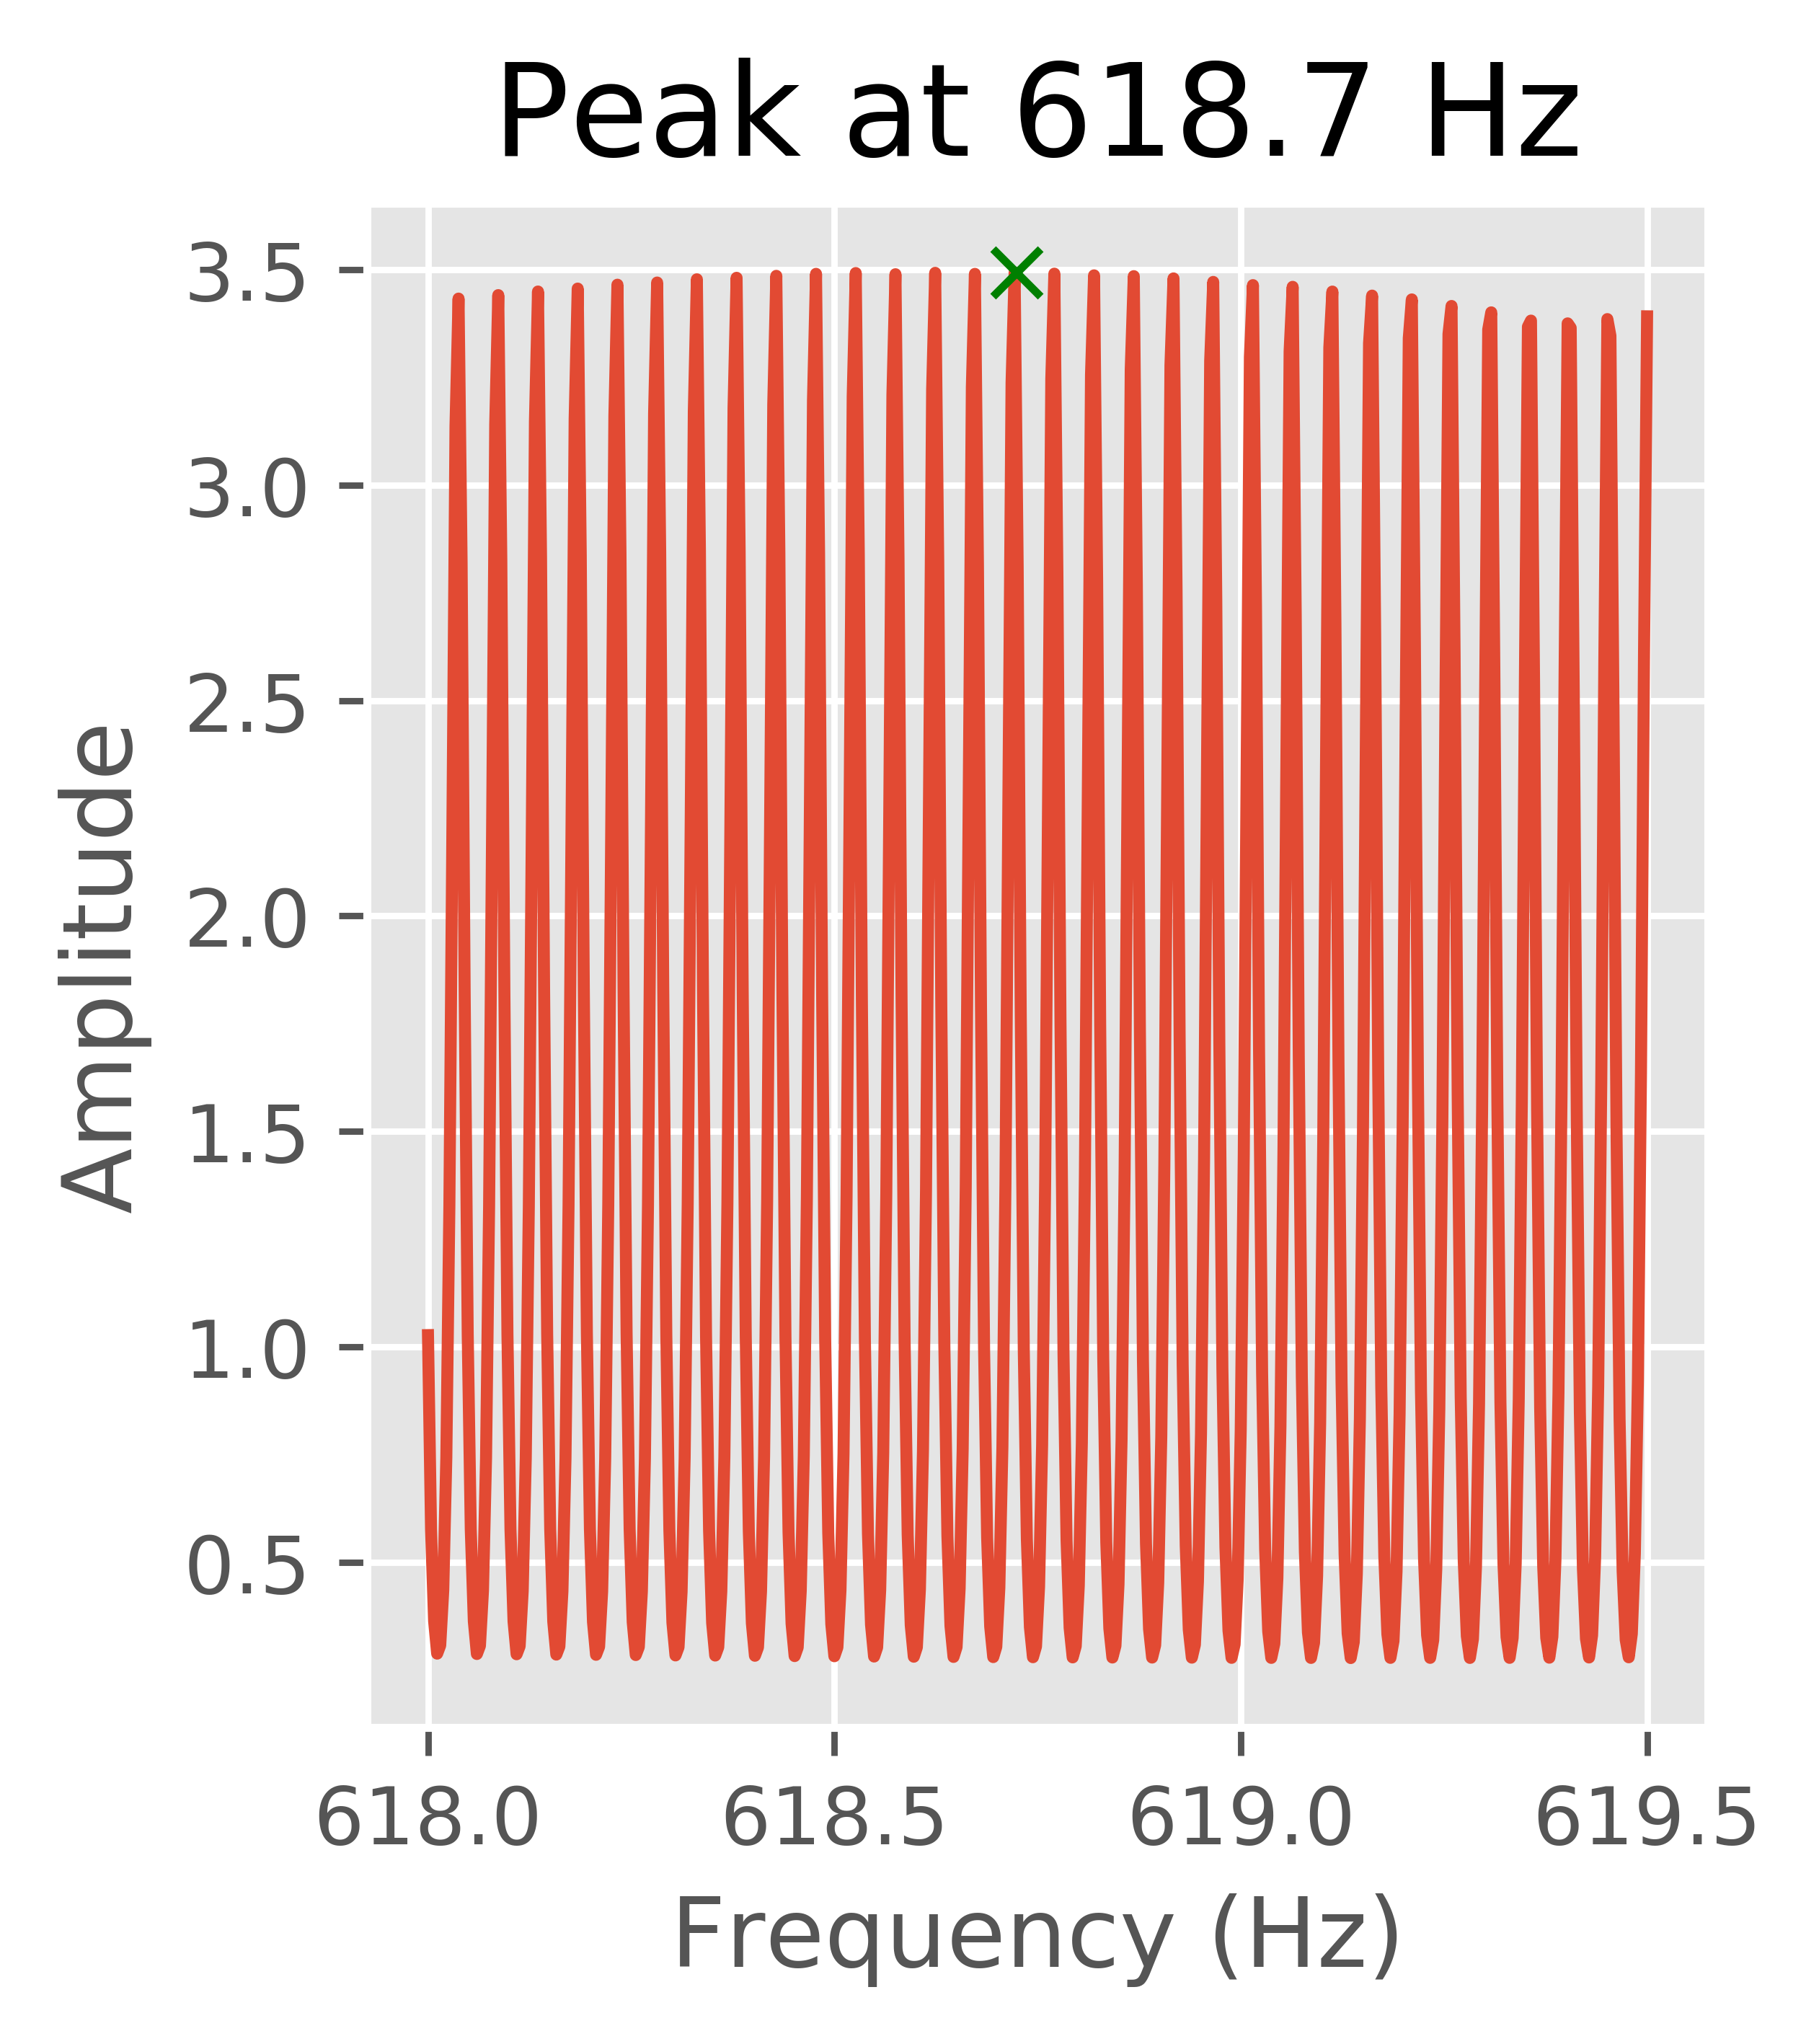

In [58]:
fig = plt.figure(dpi = 800, figsize = (3,3.5))
plt.title("Peak at 618.7 Hz", fontsize = 16)
plt.ylabel("Amplitude", fontsize = 12)
plt.xlabel("Frequency (Hz)", fontsize = 12)
plt.plot(np.linspace(618, 619.5, 400), data.iloc[84800:85200])
plt.plot(618.72375, 3.4936548713757274, marker='x',color='g')
plt.show()

In [32]:
print(peaksf)

[438.85125, 618.72375, 794.40375, 965.01, 1156.93125]


In [69]:
meansn = sn(means, 0)
stdsn = sn(stds, 0)

In [74]:
sn.table([sn(np.linspace(1, 10, 10), 0), meansn, stdsn/2], ["Trial no.", "Mean", "Std err"], fmt = "latex")

\begin{tabular}{rrr}
\hline
   Trial no. &   Mean &   Std err \\
\hline
           1 &    179 &         3 \\
           2 &    179 &         2 \\
           3 &    175 &         1 \\
           4 &    178 &         2 \\
           5 &    179 &         3 \\
           6 &    178 &         2 \\
           7 &    179 &         3 \\
           8 &    177 &         2 \\
           9 &    179 &         3 \\
          10 &    179 &         3 \\
\hline
\end{tabular}


In [73]:
print(np.linspace(1, 10, 10))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
